In [435]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [342]:
df_fit = pd.read_excel('fitness_data.xlsx')
# got it from: https://www.kaggle.com/datasets/arnavsmayan/fitness-tracker-dataset

In [343]:
df_fit.shape

(36500, 16)

In [344]:
df_fit.head(10)

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad
5,1,Sara Martinez,2023-01-06,19,Female,191,80,5081,2165,NaN,1.644844,73.0,80.0,Yoga,10,Happy
6,1,Sara Martinez,2023-01-07,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,1,Sara Martinez,2023-01-08,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral
8,1,Sara Martinez,2023-01-09,19,Female,191,80,2366,2344,5.007600,3.800947,NaN,74.0,Cardio,5,Stressed
9,1,Sara Martinez,2023-01-10,19,Female,191,80,11639,3283,8.619244,2.017812,115.0,80.0,Yoga,8,Neutral


In [345]:
df_fit.nunique()

User_ID                    100
Full Name                   59
Date                       365
Age                         33
Gender                       3
Height (cm)                 36
Weight (kg)                 40
Steps_Taken              15614
Calories_Burned           2500
Hours_Slept              32841
Water_Intake (Liters)    31099
Active_Minutes              90
Heart_Rate (bpm)            40
Workout_Type                 3
Stress_Level (1-10)         10
Mood                         4
dtype: int64

In [346]:
df_fit.isna().sum()

User_ID                     0
Full Name                   0
Date                        0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Steps_Taken                 0
Calories_Burned             0
Hours_Slept              3659
Water_Intake (Liters)    5401
Active_Minutes           1867
Heart_Rate (bpm)         1832
Workout_Type             9192
Stress_Level (1-10)         0
Mood                        0
dtype: int64

In [347]:
# dropped all lines with NULL-values since I considered columns Hours_Slept, Water_Intake, Active_Minutes, Heart_Rate, in which they appearedimportant
df_fit.dropna(inplace= True)
df_fit

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
6,1,Sara Martinez,2023-01-07,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,1,Sara Martinez,2023-01-08,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36488,100,Sara Jones,2023-12-20,54,Male,151,107,6589,2016,5.130703,2.444789,32.0,80.0,Strength,2,Stressed
36489,100,Sara Jones,2023-12-21,54,Male,151,107,6579,3599,6.864497,2.135957,85.0,76.0,Cardio,3,Sad
36490,100,Sara Jones,2023-12-22,54,Male,151,107,13320,2030,8.763487,1.590835,59.0,90.0,Yoga,4,Stressed
36497,100,Sara Jones,2023-12-29,54,Male,151,107,11892,2906,7.173268,3.237390,43.0,67.0,Cardio,9,Happy


In [348]:
df_fit['Mood'].unique()  

array(['Happy', 'Sad', 'Neutral', 'Stressed'], dtype=object)

In [349]:
# drop 'useless' columns
df_fit2 = df_fit.drop(columns=['Full Name','Date', 'User_ID'])
df_fit2.head()

,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
2,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
6,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral


In [350]:
df_fit2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18883 entries, 0 to 36498
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    18883 non-null  int64  
 1   Gender                 18883 non-null  object 
 2   Height (cm)            18883 non-null  int64  
 3   Weight (kg)            18883 non-null  int64  
 4   Steps_Taken            18883 non-null  int64  
 5   Calories_Burned        18883 non-null  int64  
 6   Hours_Slept            18883 non-null  float64
 7   Water_Intake (Liters)  18883 non-null  float64
 8   Active_Minutes         18883 non-null  float64
 9   Heart_Rate (bpm)       18883 non-null  float64
 10  Workout_Type           18883 non-null  object 
 11  Stress_Level (1-10)    18883 non-null  int64  
 12  Mood                   18883 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 2.0+ MB


In [351]:
num_df = df_fit2.select_dtypes('number')
num_df

,Age,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Stress_Level (1-10)
0,19,191,80,11405,1862,7.021201,3.440508,80.0,84.0,2
2,19,191,80,18942,2274,8.167817,3.814843,46.0,85.0,6
3,19,191,80,13778,2656,7.453552,3.508636,105.0,77.0,2
6,19,191,80,12078,1756,8.983713,2.701125,34.0,70.0,1
7,19,191,80,18323,3167,6.925079,2.594056,102.0,88.0,3
...,...,...,...,...,...,...,...,...,...,...
36488,54,151,107,6589,2016,5.130703,2.444789,32.0,80.0,2
36489,54,151,107,6579,3599,6.864497,2.135957,85.0,76.0,3
36490,54,151,107,13320,2030,8.763487,1.590835,59.0,90.0,4
36497,54,151,107,11892,2906,7.173268,3.237390,43.0,67.0,9


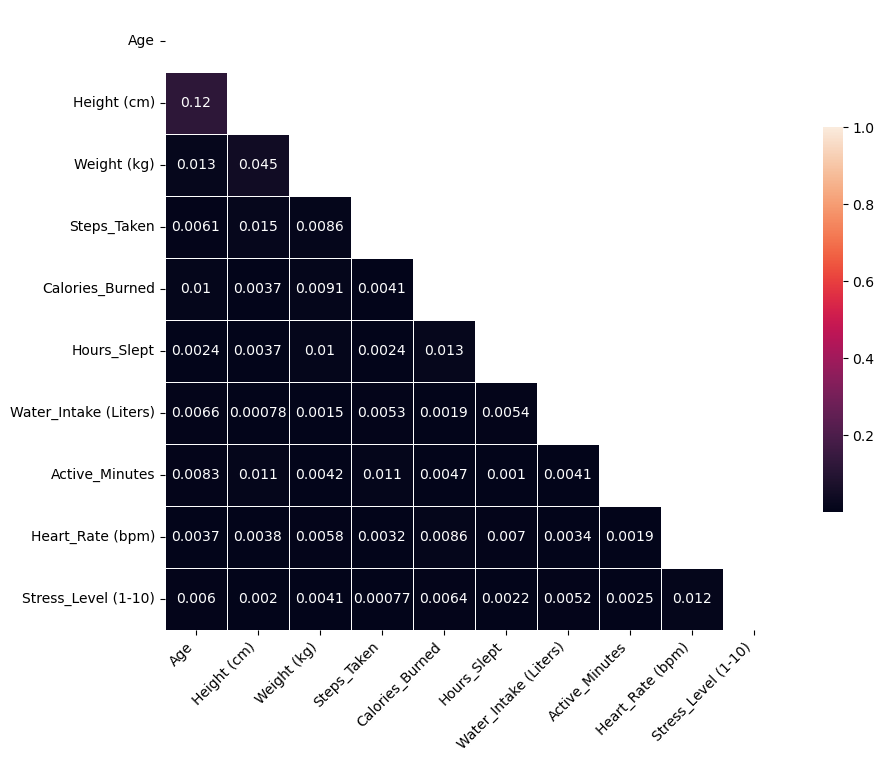

In [352]:
# corr=np.abs(df_fit_final.corr())
corr=np.abs(num_df.corr())


# cols = [target] + [col for col in df_fit3.columns if col != target]


#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.xticks(rotation=45, ha='right')
plt.show()

In [353]:
df_gender = pd.get_dummies(df_fit2['Gender'], dtype=int)
#df_gender.head()
df_fit2.drop(columns= ['Gender'], inplace = True) # drop the old gender column

In [354]:
df_fit2['Height_Weight_Ratio'] = df_fit2['Height (cm)'] / df_fit2['Weight (kg)']

df_fit2['Steps_per_Active_Minute'] = df_fit2['Steps_Taken'] / df_fit2['Active_Minutes'] #.replace(0, np.nan)



In [355]:
#df_fit_test = df_fit2.drop(columns = ['Height (cm)', 'Weight (kg)', 'Water_Intake (Liters)', 'Stress_Level (1-10)', 'Mood'])

In [356]:
df_fit3 = df_fit2.drop(columns = ['Height (cm)', 'Weight (kg)', 'Water_Intake (Liters)', 'Stress_Level (1-10)', 'Mood', 'Steps_Taken', 'Active_Minutes'])
df_fit3

,Age,Calories_Burned,Hours_Slept,Heart_Rate (bpm),Workout_Type,Height_Weight_Ratio,Steps_per_Active_Minute
0,19,1862,7.021201,84.0,Yoga,2.387500,142.562500
2,19,2274,8.167817,85.0,Yoga,2.387500,411.782609
3,19,2656,7.453552,77.0,Yoga,2.387500,131.219048
6,19,1756,8.983713,70.0,Cardio,2.387500,355.235294
7,19,3167,6.925079,88.0,Yoga,2.387500,179.637255
...,...,...,...,...,...,...,...
36488,54,2016,5.130703,80.0,Strength,1.411215,205.906250
36489,54,3599,6.864497,76.0,Cardio,1.411215,77.400000
36490,54,2030,8.763487,90.0,Yoga,1.411215,225.762712
36497,54,2906,7.173268,67.0,Cardio,1.411215,276.558140


In [357]:
workout_order = ['None', 'Yoga', 'Strength', 'Cardio']  # ranking by workout-intensity

# convert workout_type column into ordinal variable
df_fit2['Workout_Type'] = pd.Categorical(df_fit2['Workout_Type'], categories=workout_order, ordered=True)
df_fit2['Workout_Type'] = df_fit2['Workout_Type'].cat.codes    
df_fit2.head()

,Age,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Height_Weight_Ratio,Steps_per_Active_Minute
0,19,191,80,11405,1862,7.021201,3.440508,80.0,84.0,1,2,Happy,2.3875,142.562500
2,19,191,80,18942,2274,8.167817,3.814843,46.0,85.0,1,6,Sad,2.3875,411.782609
3,19,191,80,13778,2656,7.453552,3.508636,105.0,77.0,1,2,Sad,2.3875,131.219048
6,19,191,80,12078,1756,8.983713,2.701125,34.0,70.0,3,1,Neutral,2.3875,355.235294
7,19,191,80,18323,3167,6.925079,2.594056,102.0,88.0,1,3,Neutral,2.3875,179.637255


In [358]:
print(df_fit2['Workout_Type'].unique())


[1 3 2]


In [359]:
df_fit2.dtypes

Age                          int64
Height (cm)                  int64
Weight (kg)                  int64
Steps_Taken                  int64
Calories_Burned              int64
Hours_Slept                float64
Water_Intake (Liters)      float64
Active_Minutes             float64
Heart_Rate (bpm)           float64
Workout_Type                  int8
Stress_Level (1-10)          int64
Mood                        object
Height_Weight_Ratio        float64
Steps_per_Active_Minute    float64
dtype: object

In [360]:
mood_order = ['Happy', 'Neutral', 'Sad', 'Stressed']
df_fit2['Mood'] = pd.Categorical(df_fit2['Mood'], categories= mood_order, ordered=True)
df_fit2['Mood'] = df_fit2['Mood'].cat.codes    
df_fit2

,Age,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Height_Weight_Ratio,Steps_per_Active_Minute
0,19,191,80,11405,1862,7.021201,3.440508,80.0,84.0,1,2,0,2.387500,142.562500
2,19,191,80,18942,2274,8.167817,3.814843,46.0,85.0,1,6,2,2.387500,411.782609
3,19,191,80,13778,2656,7.453552,3.508636,105.0,77.0,1,2,2,2.387500,131.219048
6,19,191,80,12078,1756,8.983713,2.701125,34.0,70.0,3,1,1,2.387500,355.235294
7,19,191,80,18323,3167,6.925079,2.594056,102.0,88.0,1,3,1,2.387500,179.637255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36488,54,151,107,6589,2016,5.130703,2.444789,32.0,80.0,2,2,3,1.411215,205.906250
36489,54,151,107,6579,3599,6.864497,2.135957,85.0,76.0,3,3,2,1.411215,77.400000
36490,54,151,107,13320,2030,8.763487,1.590835,59.0,90.0,1,4,3,1.411215,225.762712
36497,54,151,107,11892,2906,7.173268,3.237390,43.0,67.0,3,9,0,1.411215,276.558140


In [361]:
df_fit_final = pd.concat([df_fit2, df_gender], axis=1)
df_fit_final = df_fit_final.drop(columns= 'Other')
df_fit_final

,Age,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Height_Weight_Ratio,Steps_per_Active_Minute,Female,Male
0,19,191,80,11405,1862,7.021201,3.440508,80.0,84.0,1,2,0,2.387500,142.562500,1,0
2,19,191,80,18942,2274,8.167817,3.814843,46.0,85.0,1,6,2,2.387500,411.782609,1,0
3,19,191,80,13778,2656,7.453552,3.508636,105.0,77.0,1,2,2,2.387500,131.219048,1,0
6,19,191,80,12078,1756,8.983713,2.701125,34.0,70.0,3,1,1,2.387500,355.235294,1,0
7,19,191,80,18323,3167,6.925079,2.594056,102.0,88.0,1,3,1,2.387500,179.637255,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36488,54,151,107,6589,2016,5.130703,2.444789,32.0,80.0,2,2,3,1.411215,205.906250,0,1
36489,54,151,107,6579,3599,6.864497,2.135957,85.0,76.0,3,3,2,1.411215,77.400000,0,1
36490,54,151,107,13320,2030,8.763487,1.590835,59.0,90.0,1,4,3,1.411215,225.762712,0,1
36497,54,151,107,11892,2906,7.173268,3.237390,43.0,67.0,3,9,0,1.411215,276.558140,0,1


In [362]:
# definition of bins for agegroups
bins = [0, 17, 29, 39, 49, 64, 100] 
labels = ['0-17', '18-29', '30-39', '40-49', '50-64', '65+']  # Labels for groups

# create agegroups
df_fit_final['Age_Group'] = pd.cut(df_fit_final['Age'], bins=bins, labels=labels, right=True)
#df_fit_final.drop(columns=['Other'], inplace=True)
df_fit_final.drop(columns=['Age'], inplace=True)

# Label-Encoding
df_fit_final['Age_Group'] = df_fit_final['Age_Group'].cat.codes



#df_fit_final.tail(40) # prove


In [363]:
features = df_fit_final.drop(columns = ["Calories_Burned"])

In [364]:
target = df_fit_final['Calories_Burned']

In [365]:
#sns.pairplot(df_fit_final, hue="Calories_Burned")
#plt.show()

In [366]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [367]:
from sklearn.preprocessing import MinMaxScaler

In [368]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [369]:
from sklearn.neighbors import KNeighborsRegressor

In [370]:
knn = KNeighborsRegressor(n_neighbors= 10)

In [371]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [372]:
knn.predict(X_test_scaled)

array([3368. , 3040.1, 2190.7, ..., 2482.4, 2836.6, 2803.5])

In [373]:
y_test

31094    2283
4917     1835
25482    2573
22193    1587
12625    2591
         ... 
1993     1641
13637    3741
27410    2865
36013    2169
20637    3582
Name: Calories_Burned, Length: 3777, dtype: int64

In [374]:
knn.score(X_test_scaled, y_test) # score = accuracy

-0.10484511912528083

In [375]:
# tst in two notebooks for workout type ordinal or nominal
# heatmap for stress and mood

In [376]:
from sklearn.linear_model import LinearRegression

In [377]:
len_reg = LinearRegression()

In [378]:
len_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [379]:
len_reg.score(X_test_scaled,y_test)

-0.003708058527628344

In [380]:
from sklearn.tree import DecisionTreeRegressor

In [381]:
tree = DecisionTreeRegressor(max_depth = 3)

In [382]:
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [383]:
tree.score(X_test_scaled,y_test)

-0.0027383083101333305

In [407]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)


Cross-validated R² scores: [-0.09290953 -0.10158643 -0.10269024 -0.10355303 -0.10627241]


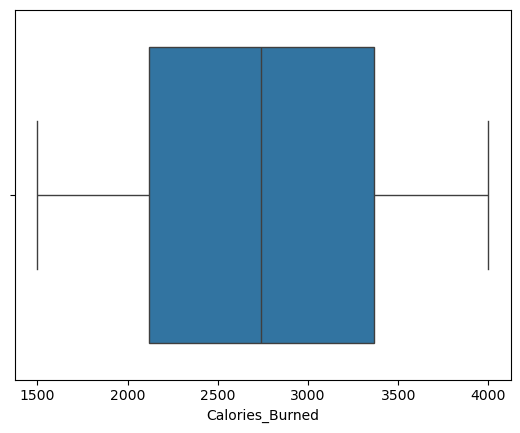

In [409]:
sns.boxplot(x=df_fit_final['Calories_Burned'])
plt.show()

In [411]:
Q1 = df_fit_final['Calories_Burned'].quantile(0.25)
Q3 = df_fit_final['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_fit_final[(df_fit_final['Calories_Burned'] < lower_bound) | 
                        (df_fit_final['Calories_Burned'] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 0


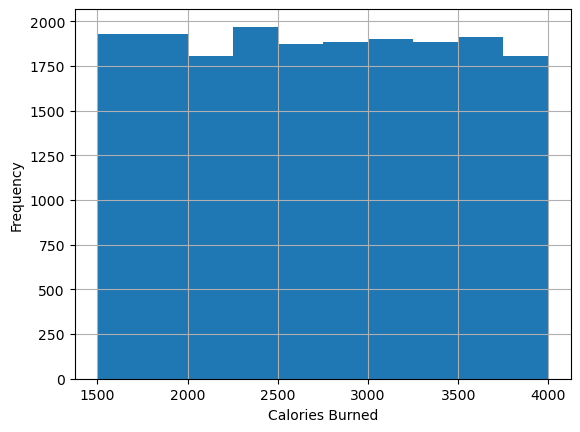

In [413]:
df_fit_final['Calories_Burned'].hist()
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#####################################  Applying ensemble methods  ##############################################################

In [415]:
################# BAGGING ############################################
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=60,
                               max_samples = 10000)

In [417]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=10000, n_estimators=60)

In [419]:
pred = bagging_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MAE 636.2794646917577
RMSE 734.8596015794154
R2 score -0.01931654599988586


C:\Users\Rike\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
######################### RANDOM FORREST ######################################

In [421]:
forest = RandomForestRegressor(n_estimators=60,      # trees 
                             max_depth=20)            # depth of each tree

In [423]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, n_estimators=60)

In [425]:
pred = forest.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_scaled, y_test))

MAE 633.4396915315307
RMSE 732.2128583469697
R2 score -0.011987225657730471


C:\Users\Rike\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
######################### ADABOOST ######################################

In [427]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), # generally it would be shorter than an unique tree
                            n_estimators=100)

In [429]:
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=100)

In [439]:
pred = ada_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MAE 633.0859467741608
RMSE 728.5153142456687
R2 score -0.0017923227045799628


In [ ]:
######################### GRADIENT BOOST ######################################

In [441]:
gb_reg = GradientBoostingRegressor(max_depth=5,
                                   n_estimators=100)

In [443]:
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5)

In [447]:
pred = gb_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MAE 634.0100842909168
RMSE 732.2432925651234
R2 score -0.012071353325579848


In [449]:
# lists of values I noted during testing the best possible outcome
outcomes =  {
    'Model': ['KNN_Regressor', 'KNN_simpl' , 'Linear_regression', 'Lin_Reg_simpl','Decision_Tree', 'Dec_Tree_simpl', 
              'Bagging','Random_Forest', 'AdaBoost','Gradient Boosting'],
    'R2 Score': [-0.08667, -0.09569, -0.00067, -0.00062, -0.00258, -0.00229, -0.021461, -0.02526, -0.000175, -0.00611] }  
    
results_df = pd.DataFrame(outcomes)
results_df


,Model,R2 Score
0,KNN_Regressor,-0.086670
1,KNN_simpl,-0.095690
2,Linear_regression,-0.000670
3,Lin_Reg_simpl,-0.000620
4,Decision_Tree,-0.002580
5,Dec_Tree_simpl,-0.002290
6,Bagging,-0.021461
7,Random_Forest,-0.025260
8,AdaBoost,-0.000175
9,Gradient Boosting,-0.006110


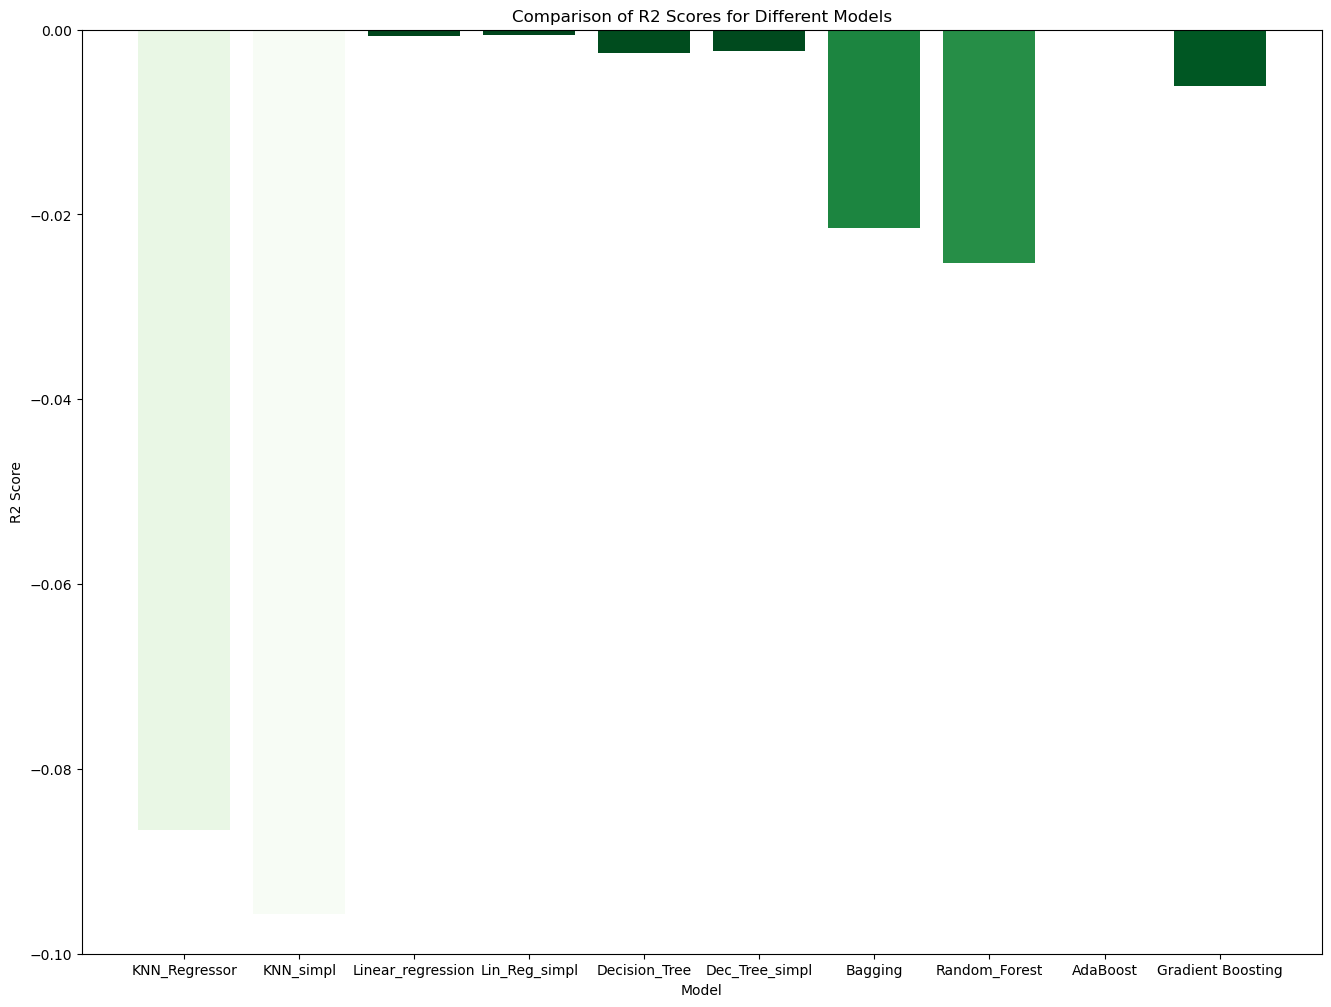

In [451]:
plt.figure(figsize=(16, 12))
norm = plt.Normalize(results_df["R2 Score"].min(), results_df["R2 Score"].max())
colors = plt.cm.Greens(norm(results_df["R2 Score"]))
plt.bar(results_df["Model"], results_df["R2 Score"], color=colors)
plt.ylim(-0.1, 0)  # Setzt den Bereich der y-Achse von -0.1 bis 0

plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Comparison of R2 Scores for Different Models")
plt.show()